In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import folium
from folium import plugins

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import plot_importance, XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.tree import DecisionTreeClassifier

from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, root_mean_squared_error, r2_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import shap


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\smhrd\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\smhrd\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [ ]:
pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('data/(최종)_서울열선_광진도로.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7159 entries, 0 to 7158
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   도로명           7159 non-null   object 
 1   열선            7159 non-null   int64  
 2   도로 종류         7159 non-null   object 
 3   시작점_위도        7159 non-null   float64
 4   시작점_경도        7159 non-null   float64
 5   종료점_위도        7159 non-null   float64
 6   종료점_경도        7159 non-null   float64
 7   중앙점_위도        7159 non-null   float64
 8   중앙점_경도        7159 non-null   float64
 9   도로_길이         7159 non-null   float64
 10  도로폭           7159 non-null   object 
 11  도로규모          7159 non-null   object 
 12  행정구역          7159 non-null   object 
 13  고도의_차이        7159 non-null   float64
 14  경사각           7159 non-null   float64
 15  최근접_시설들_거리    7159 non-null   object 
 16  최근접_시설의_평균거리  7159 non-null   float64
 17  2019_평균_온도    7159 non-null   float64
 18  2020_평균_온도    7159 non-null 

In [5]:
data.head()

도로명  열선   도로 종류     시작점_위도      시작점_경도     종료점_위도      종료점_경도  \
0      일원로   1     3차로  37.491015  127.080765  37.490648  127.080938   
1    자곡로5길   1  주거지 도로  37.472343  127.096176  37.472057  127.094614   
2  삼성로112길   1  주거지 도로  37.514052  127.052859  37.514866  127.053307   
3  삼성로149길   1  주거지 도로  37.523404  127.047378  37.523375  127.047124   
4  압구정로71길   1  주거지 도로  37.528605  127.046188  37.529140  127.046384   

      중앙점_위도      중앙점_경도       도로_길이  ... 2020_평균_온도 2021_평균_온도 2022_평균_온도  \
0  37.490832  127.080852   43.557286  ...   0.881741  -2.871131  -1.719942   
1  37.472200  127.095395  218.130971  ...   0.151180  -5.008077  -2.071998   
2  37.514459  127.053083   98.751984  ...   1.907717  -1.829318  -0.318553   
3  37.523389  127.047251   22.669102  ...   3.624133  -2.501301  -0.068183   
4  37.528873  127.046286   61.909056  ...   1.475907  -4.912372  -2.749620   

   2023_평균_온도  2024_평균_온도  종합_평균_기온   행정동          생활인구  최근접_시설들_최소거리  \
0   -4.994405   -0.762408 -1.063733  일원1동  3.303279e+05    141.887303   
1   -4.362071   -1.637150 -1.766170   세곡동  1.123343e+06     62.368275   
2   -7.448543   -2.587549 -0.948210  삼성1동  9.879387e+05    117.137149   
3   -6.494916   -3.226149 -0.569161   청담동  9.285286e+05    170.745688   
4   -8.776444   -5.549833 -2.914910   청담동  9.285286e+05    119.573040   

   최근접_시설들_최대거리  
0    267.191172  
1    111.440940  
2    181.435958  
3    427.222876  
4    497.095607  

[5 rows x 28 columns]

In [213]:
X = pd.get_dummies(data[['도로 종류', '도로폭', '경사각', '최근접_시설의_평균거리', '종합_평균_기온', '생활인구', '최근접_시설들_최소거리', '최근접_시설들_최대거리']])
y = data['열선']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
X_train = X_train.astype('float')
X_test = X_test.astype('float')

data1 = data.loc[X_test.index,:]
data1_test = pd.get_dummies(data1[data1['열선'] == 0][['도로 종류', '도로폭', '경사각', '최근접_시설의_평균거리', '종합_평균_기온', '생활인구', '최근접_시설들_최소거리', '최근접_시설들_최대거리']])
data1_test = data1_test.astype('float')

data_test = pd.get_dummies(data[data['열선'] == 0][['도로 종류', '도로폭', '경사각', '최근접_시설의_평균거리', '종합_평균_기온', '생활인구', '최근접_시설들_최소거리', '최근접_시설들_최대거리']])
data_test = data_test.astype('float')

In [ ]:
data['도로 종류'].unique()

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
X_train = X_train.astype('float')
X_test = X_test.astype('float')
data_test = data_test.astype('float')

In [463]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5727, 15), (1432, 15), (5727,), (1432,))

In [ ]:
lgbm = LGBMClassifier(
    n_estimators = 25,
    max_depth = 3
)

In [ ]:
rs = cross_val_score(lgbm, X_train, y_train, cv = 5)
print(rs*100)
print(rs.mean()*100)

In [ ]:
# 하이퍼 파라미터 목록 조합식 만들어보기
params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': range(2, 9)
}

In [ ]:
for i in range(2, 6):
    print(i)

In [ ]:
grid = GridSearchCV(
    estimator = lgbm, # 하이퍼 파라미터를 찾을 모델
    param_grid = params,  # 하이퍼 파라미터 뭉치
    cv = 5, # 교차검증할 때 몇 개의 데이터로 나눌지
    n_jobs = -1
)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
# 모델의 최적의 하이퍼 파라미터 조합식 확인
grid.best_params_

In [ ]:
lgbm = LGBMClassifier(
    n_estimators = 150,
    max_depth = 7,
    num_leaves = 75
    
)

In [ ]:
# 최적의 하이퍼 파라미터 조합식의 교차검증 점수 확인
grid.best_score_

In [ ]:
# 최적의 하이퍼 파라미터가 적용된 모델 불러오기
final_lgbm_model = grid.best_estimator_

In [ ]:
final_lgbm_model.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

In [ ]:
print(final_lgbm_model.score(X_test, y_test))
print(lgbm.score(X_test, y_test))

In [ ]:
final_lgbm_model.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

In [ ]:
a = final_lgbm_model.predict(X_train)

In [ ]:
a = pd.Series(a)

In [ ]:
a[a != 0]

In [ ]:
data.iloc[1032,:]

In [ ]:
y_train[y_train!=0]

In [ ]:
a[1032]

In [ ]:
print(f"정확도 확인: {accuracy_score(y_train, a)}")

In [ ]:
data_test = pd.get_dummies(data[data['열선'] == 0][['도로 종류', '도로폭', '경사각', '최근접_시설의_평균거리', '종합_평균_기온', '생활인구', '최근접_시설들_최소거리', '최근접_시설들_최대거리']])

In [471]:
data_test_pred = xgb_best_model.predict(data_test)

In [487]:
data(pd.Series(data_test_pred).index+1051)

RangeIndex(start=1051, stop=7159, step=1)

In [ ]:
data_test_pred = lgbm.predict(data_test)

In [ ]:
data_test_pred = pd.Series(data_test_pred)
data_test_pred[data_test_pred != 0].index

In [ ]:
df = data.iloc[data_test_pred[data_test_pred != 0].index,:]

In [ ]:

if len(df) > 0 :
    
    # 시작점과 종료점의 위도, 경도를 기반으로 지도에 직선을 그립니다.
    m = folium.Map(location=[df['중앙점_위도'].mean(), df['중앙점_경도'].mean()], zoom_start=12)
    
    # 데이터프레임의 각 도로에 대해 직선과 마커를 추가합니다.
    for idx, row in df.iterrows():
        # 시작점과 종료점 좌표
        start_point = [row['시작점_위도'], row['시작점_경도']]
        end_point = [row['종료점_위도'], row['종료점_경도']]
        
        # 직선을 그리기
        folium.PolyLine([start_point, end_point], color="blue", weight=2.5, opacity=1).add_to(m)
    
        # folium.Marker(
        #     location=end_point,
        #     popup=f"Index: {idx}<br>도로명: {row['도로명']}",
        #     icon=folium.Icon(color='green')
        # ).add_to(m)
    
    # 지도 출력
    try :
        save_url = './결과.html'
        m.save(save_url)
        print(f"{save_url} 파일 저장 완료. ")
    except OSError as e :
        print(e)

else :
    print(f"파일 길이가 {len(df)}라 지도 제작이 불가능합니다.")

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
Lasso()

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(X_train, y_train)

In [ ]:
# 가중치 / 절편 확인하기
print(f'가중치: {linear_model.coef_}')
print(f'절편: {linear_model.intercept_}')

In [ ]:
# 모델 평가
print(f'모델 평가: {round(linear_model.score(X_test, y_test) * 100, 2)}%')

In [ ]:
# 평가 지표를 통해 평균 제곱 오차와 평균 제곱근 오차를 확인 해보자
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [ ]:
# 모델 예측 진행
pred = linear_model.predict(X_test)
print(f'mse: {round(mean_squared_error(y_test, pred),3)}')
print(f'rmse: {round(root_mean_squared_error(y_test, pred),3)}')

In [ ]:
linear_model.predict(X_test)

In [ ]:
lasso_model = Lasso(alpha = 0.0008)

In [ ]:
lasso_model.fit(X_train, y_train)

In [ ]:
# 모델 평가
print(f'모델 평가: {round(lasso_model.score(X_test, y_test) * 100, 2)}%')

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
# 데이터 스케일링 (SVR은 특성의 스케일에 민감하므로 표준화 필요)
sc_X = StandardScaler()
sc_data_test = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
data_test_scaled = sc_data_test.fit_transform(data_test)
y_scaled = sc_y.fit_transform(np.array(y_train).reshape(-1, 1))
X_scaled_test = sc_X.fit_transform(X_test)
y_scaled_test = sc_y.fit_transform(np.array(y_test).reshape(-1, 1))

# SVR 모델 학습 (RBF 커널 사용)
regressor = SVR(kernel='rbf', C=100, epsilon=0.1)
regressor.fit(X_scaled, y_scaled.ravel())

# 예측
y_pred = regressor.predict(data_test_scaled)

# 예측 결과를 원래의 스케일로 복원
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

In [ ]:
# 하이퍼 파라미터 목록 조합식 만들어보기
params = {
    'C': [1, 10, 50, 100, 150, 200],
    'epsilon': [0.01, 0.1, 0.5, 1, 10, 100]
}

grid = GridSearchCV(
    estimator = regressor, # 하이퍼 파라미터를 찾을 모델
    param_grid = params,  # 하이퍼 파라미터 뭉치
    cv = 5, # 교차검증할 때 몇 개의 데이터로 나눌지
    n_jobs = -1
)

grid.fit(X_scaled, y_scaled.ravel())

In [ ]:
final_svr_model = grid.best_estimator_
final_svr_model.fit(X_scaled, y_scaled.ravel())
print(final_svr_model.score(X_scaled_test, y_scaled_test.ravel()))

In [ ]:
# 예측
y_pred = final_svr_model.predict(data_test_scaled)

# 예측 결과를 원래의 스케일로 복원
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

In [ ]:
# 모델 평가
print(f'모델 평가: {round(regressor.score(X_scaled_test, y_scaled_test.ravel()) * 100, 2)}%')

In [ ]:
y_pred

In [ ]:
y_pred = pd.Series(y_pred.reshape(1,-1)[0])

In [ ]:
y_pred.index = y_pred.index+1051

In [ ]:
y_pred

In [ ]:
data_test

In [ ]:
data.loc[y_pred[y_pred>1].index,:]

In [497]:
y_pred = xgb_best_model.predict(data_test)
y_pred = pd.DataFrame(y_pred)
y_pred.index = y_pred.index+1051
y_pred.sort_values(ascending=False, by=0)

0
5141  0.706813
4378  0.678072
5349  0.510463
1352  0.484576
1275  0.478567
...        ...
6916 -0.061992
6903 -0.061992
5524 -0.063958
5386 -0.063958
2147 -0.079064

[6108 rows x 1 columns]

In [501]:
y_pred = xgb_best_model.predict(data_test)
y_pred = pd.DataFrame(y_pred)
y_pred.index = y_pred.index+1051
y_pred = y_pred.sort_values(ascending=False, by=0)
df = data.loc[y_pred.iloc[:15,0].index,:]
df['score'] = y_pred.iloc[:15,0]*100
if len(df) > 0 :
    
    # 시작점과 종료점의 위도, 경도를 기반으로 지도에 직선을 그립니다.
    m = folium.Map(location=[df['중앙점_위도'].mean(), df['중앙점_경도'].mean()], zoom_start=12)
    
    # 데이터프레임의 각 도로에 대해 직선과 마커를 추가합니다.
    for idx, row in df.iterrows():
        # 시작점과 종료점 좌표
        start_point = [row['시작점_위도'], row['시작점_경도']]
        end_point = [row['종료점_위도'], row['종료점_경도']]
        
        # 직선을 그리기
        folium.PolyLine([start_point, end_point], color="blue", weight=2.5, opacity=1).add_to(m)
    
        folium.Marker(
            location=end_point,
            popup=f"Index: {idx}<br>도로명: {row['도로명']}<br>점수: {row['score']}",
            icon=folium.Icon(color='green')
        ).add_to(m)
    
    # 지도 출력
    try :
        save_url = './0411XGBoost상위15결과.html'
        m.save(save_url)
        print(f"{save_url} 파일 저장 완료. ")
    except OSError as e :
        print(e)

else :
    print(f"파일 길이가 {len(df)}라 지도 제작이 불가능합니다.")

./0411XGBoost상위15결과.html 파일 저장 완료. 


In [ ]:
pd.DataFrame(y_pred).sort_values(ascending=False, by=0).iloc[:10,0]#.index

In [ ]:
# 데이터 준비
# data = pd.read_csv('data/(최종)_서울열선_광진도로.csv')
# X = pd.get_dummies(data[['도로 종류', '도로폭', '경사각', '최근접_시설의_평균거리', '종합_평균_기온', '생활인구']])
# y = data['열선']


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# XGBoost 모델 정의
# model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, device='cuda')
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.2, max_depth=3, device='cuda', colsample_bytree= 0.9, subsample= 1.0)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

In [ ]:
# DMatrix로 변환
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 최신 GPU 설정 방식
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.2,
    'max_depth': 3,
    'tree_method': 'hist',
    'device': 'cuda',
}

# 학습
model = xgb.train(params, dtrain, num_boost_round=300)

# 예측
y_pred = model.predict(dtest)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

In [ ]:
# 특성 중요도 출력
print(model.feature_importances_)

# 특성 중요도 시각화
xgb.plot_importance(model)
plt.show()


In [ ]:
# gridSearch
model = xgb.XGBRegressor(verbosity=2,  # 또는 3으로도 가능 (더 자세한 로그)
    tree_method='hist',
    device='cuda')

param_grid = {
    'tree_method': ['hist'],
    'objective': ['reg:squarederror'],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [100, 150, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    # 'gamma': [0, 0.1],
    # 'reg_alpha': [0, 0.001, 0.005, 0.01],
    # 'reg_lambda': [1, 1.5, 2],
    'device': ['cuda']
}

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=4,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,         # 병렬 처리 (CPU 코어 다 사용)
                           verbose=2)         # 👈 진행상황 자세히 출력

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
# 튜닝된 최적 모델로 학습 후
xgb_best_model = xgb.XGBRegressor(colsample_bytree= 0.9, device= 'cuda', learning_rate= 0.2, max_depth= 3, n_estimators= 300, objective= 'reg:squarederror')
xgb_best_model.fit(X_train, y_train)
# 훈련셋 성능
print("Train R²:", r2_score(y_train, xgb_best_model.predict(X_train)))

# 검증셋 성능
print("Test  R²:", r2_score(y_test, xgb_best_model.predict(X_test)))

# 두 값이 유사하면 → 일반화 잘 됨 👍

# Train R² >> Test R² → 과적합 가능성 있음 ⚠️

In [ ]:
# 5-폴드 교차검증으로 R² 점수 확인
r2_scores = cross_val_score(xgb_best_model, X_train, y_train, cv=5, scoring='r2')

# 출력
print("각 fold의 R² 점수:", r2_scores)
print(f"평균 R²: {r2_scores.mean():.4f}")
print(f"표준편차: {r2_scores.std():.4f}")

In [185]:
regression_models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'LightGBM' : LGBMRegressor(device='gpu', boosting_type='gbdt', gpu_use_dp=False, verbose=-1),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', device='cuda'),  # GPU
    'KNeighborsRegressor': KNeighborsRegressor()
}

regression_results = {}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    regression_results[name] = r2
    print(f"{name} R²: {r2:.4f}")

print("\n📊 해석 가능한 회귀 모델 성능 비교:")
for name, score in sorted(regression_results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score:.4f}")

# 분류 모델들 정의 (random_state=42 적용 가능한 곳은 모두 적용)
classification_models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),  # KNN은 random_state 없음
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(
        tree_method='hist',
        device='cuda',
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),
    'LightGBM': LGBMClassifier(device='gpu', random_state=42, verbose=-1)
}

# 결과 저장용
classification_results = []

# 모델별 학습 및 평가
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_score)
    f1 = f1_score(y_test, y_pred)

    classification_results.append({
        'Model': name,
        'Accuracy': acc,
        'ROC AUC': auc,
        'F1 Score': f1
    })

# 결과 정리 및 출력
df_classification_results = pd.DataFrame(classification_results).sort_values(by='F1 Score', ascending=False)
print(df_classification_results)

LinearRegression R²: 0.3240
Ridge R²: 0.3241
Lasso R²: 0.0052
RandomForest R²: 0.8295
GradientBoosting R²: 0.8175
LightGBM R²: 0.8852
XGBoost R²: 0.8902
KNeighborsRegressor R²: 0.9092

📊 해석 가능한 회귀 모델 성능 비교:
KNeighborsRegressor: 0.9092
XGBoost: 0.8902
LightGBM: 0.8852
RandomForest: 0.8295
GradientBoosting: 0.8175
Ridge: 0.3241
LinearRegression: 0.3240
Lasso: 0.0052


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:26:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                  Model  Accuracy   ROC AUC  F1 Score
3  KNeighborsClassifier  0.987430  0.981831  0.955224
5               XGBoost  0.986732  0.990032  0.953317
6              LightGBM  0.985335  0.991587  0.948148
2      GradientBoosting  0.972765  0.990373  0.898172
4          DecisionTree  0.969972  0.919309  0.892231
1          RandomForest  0.953911  0.986653  0.823529
0    LogisticRegression  0.884078  0.878345  0.453947


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': np.arange(10,20,1),
    'min_samples_split': [2, 3, 5, 7, 10],
    'min_samples_leaf': [2, 3, 4, 5],
    'max_features': ['sqrt', 0.5, 0.7, 1.0]
}

In [ ]:
rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=200,               # 100~300 사이 추천
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    error_score='raise'
)

random_search.fit(X_train, y_train)
print("최적 파라미터:", random_search.best_params_)
print("최고 R²:", random_search.best_score_)

In [ ]:
rf_best_model = RandomForestRegressor(n_estimators= 400, min_samples_split= 15, min_samples_leaf= 5, max_depth= 10, random_state=42)
rf_best_model.fit(X_train, y_train)

y_pred = rf_best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

In [ ]:
# 훈련셋 성능
print("Train R²:", r2_score(y_train, rf_best_model.predict(X_train)))

# 검증셋 성능
print("Test  R²:", r2_score(y_test, rf_best_model.predict(X_test)))

In [ ]:
# 5-폴드 교차검증으로 R² 점수 확인
r2_scores = cross_val_score(rf_best_model, X_train, y_train, cv=5, scoring='r2')

# 출력
print("각 fold의 R² 점수:", r2_scores)
print(f"평균 R²: {r2_scores.mean():.4f}")
print(f"표준편차: {r2_scores.std():.4f}")

In [ ]:
#LightGBM 이 gpu 사용 가능한지 확인
model = LGBMRegressor(device='gpu')
print(model.get_params().get('device', 'cpu'))

In [ ]:
#LGBMRegressor 랜덤 서치에 사용할 파라미터 조합
param_distributions = {
    'n_estimators': [100, 200, 300, 500, 700],       # 트리 개수
    'learning_rate': [0.01, 0.05, 0.1, 0.15],        # 학습률
    'max_depth': [3, 5, 7, 10, -1],                  # 트리 최대 깊이 (-1은 제한 없음)
    'num_leaves': [15, 31, 50, 70],                  # 하나의 트리에서 가질 수 있는 리프 노드 수
    'min_child_samples': [5, 10, 20, 30],            # 리프 노드가 되기 위한 최소 데이터 수
    'subsample': [0.6, 0.8, 1.0],                    # 데이터를 샘플링하는 비율 (bagging 비율)
    'colsample_bytree': [0.6, 0.8, 1.0],             # 한 트리를 만들 때 사용할 feature 비율
    'reg_alpha': [0, 0.1, 0.5],                      # L1 정규화 (특성 제거 유도)
    'reg_lambda': [0, 0.1, 0.5, 1.0],                # L2 정규화 (과적합 억제)
    'device': ['gpu'],                               # GPU 사용
}

In [ ]:
model = LGBMRegressor(random_state=42)

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=600,              # 랜덤하게 300개 조합 실험
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

search.fit(X_train, y_train)
print("Best params:", search.best_params_)
print("Best R²:", search.best_score_)

In [ ]:
# lgbm_best_model = LGBMRegressor(subsample= 0.8, reg_lambda= 0, reg_alpha= 0.5, num_leaves= 50, n_estimators= 300, min_child_samples= 5, max_depth= 3, learning_rate= 0.15, device= 'gpu', colsample_bytree= 0.6)
lgbm_best_model = LGBMRegressor(subsample= 1.0, reg_lambda= 1.0, reg_alpha= 0.5, num_leaves= 70, n_estimators= 700, min_child_samples= 5, max_depth= 3, learning_rate= 0.15, device= 'gpu', colsample_bytree= 0.6)
lgbm_best_model.fit(X_train, y_train)

y_pred = lgbm_best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

In [ ]:
# 훈련셋 성능
print("Train R²:", r2_score(y_train, lgbm_best_model.predict(X_train)))

# 검증셋 성능
print("Test  R²:", r2_score(y_test, lgbm_best_model.predict(X_test)))

In [ ]:
# 5-폴드 교차검증으로 R² 점수 확인
r2_scores = cross_val_score(lgbm_best_model, X_train, y_train, cv=5, scoring='r2')

# 출력
print("각 fold의 R² 점수:", r2_scores)
print(f"평균 R²: {r2_scores.mean():.4f}")
print(f"표준편차: {r2_scores.std():.4f}")

In [ ]:
#XGBRegressor 랜덤 서치에 사용할 파라미터 조합
param_distributions = {
    'n_estimators': [200, 300, 400, 500],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5, 7],             # 리프 노드에 필요한 최소 가중치 합
    'subsample': [0.7, 0.8, 0.9, 1.0],                # 샘플 비율
    'colsample_bytree': [0.6, 0.7, 0.9, 1.0],         # 특성 샘플링 비율
    'gamma': [0, 0.1, 0.3],                 # 트리 분할을 위한 최소 손실 감소량
    'reg_alpha': [0, 0.1],                  # L1 정규화 (가중치 0 유도)
    'reg_lambda': [1, 2],                   # L2 정규화 (가중치 크기 제한)
    'tree_method': ['hist'],                    # GPU 사용 시 'hist' + device='cuda'
    'device': ['cuda'],                         # GPU 사용
    'objective': ['reg:squarederror']
}

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=42)

search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=500,               # 200~300 추천
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

print("최적 파라미터:", search.best_params_)
print("최고 R² 점수:", search.best_score_)

In [51]:
xgb_best_model = xgb.XGBRegressor(tree_method= 'hist', subsample= 1.0, reg_lambda= 2, reg_alpha= 0.1, n_estimators= 500, min_child_weight= 3, max_depth= 3, learning_rate= 0.15, gamma= 0, device= 'cuda', objective= 'reg:squarederror')
xgb_best_model.fit(X_train, y_train)

y_pred = xgb_best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

Mean Squared Error: 0.010845236225706998
R²: 0.9133368134498596


C:\Users\smhrd\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:29:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [633]:
y_pred = xgb_best_model.predict(data_test)
y_pred = np.clip(y_pred, 0, 1)
y_score = y_pred * 100

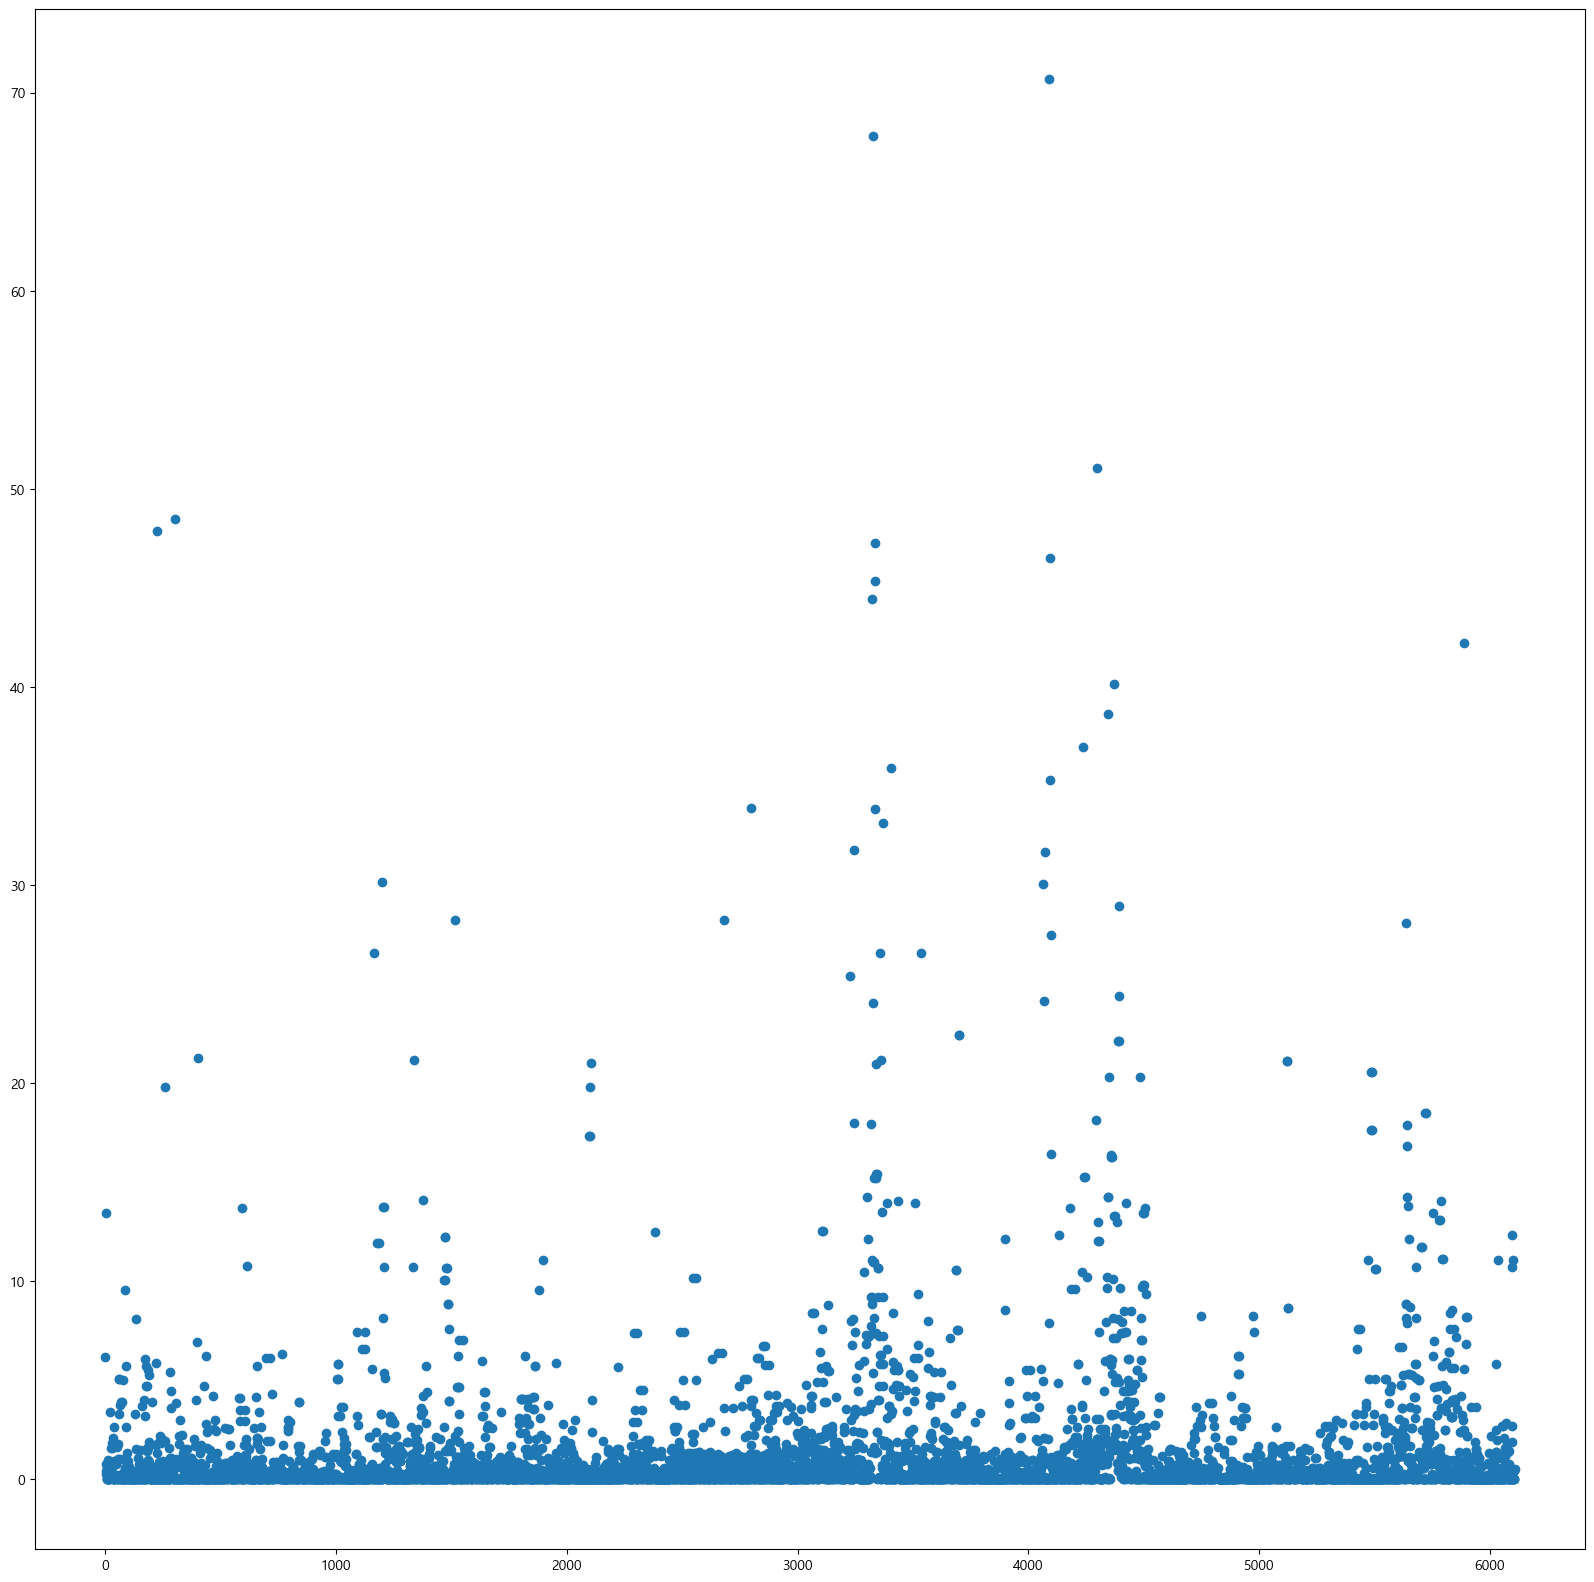

In [635]:
plt.figure(figsize=(20,20))
plt.plot(y_score, marker='o', linestyle='')

In [63]:
# 훈련셋 성능
print("Train R²:", r2_score(y_train, xgb_best_model.predict(X_train)))

# 검증셋성능
print("Test  R²:", r2_score(y_test, xgb_best_model.predict(X_test)))

Train R²: 0.9548586010932922
Test  R²: 0.9133368134498596


In [65]:
# 5-폴드 교차검증으로 R² 점수 확인
r2_scores = cross_val_score(xgb_best_model, X_train, y_train, cv=5, scoring='r2')

# 출력
print("각 fold의 R² 점수:", r2_scores)
print(f"평균 R²: {r2_scores.mean():.4f}")
print(f"표준편차: {r2_scores.std():.4f}")

각 fold의 R² 점수: [0.88232219 0.8694132  0.91932696 0.88350993 0.87947625]
평균 R²: 0.8868
표준편차: 0.0170


In [ ]:
#GradientBoostingRegressor 랜덤 서치에 사용할 파라미터 조합
param_distributions = {
    'n_estimators': [100, 200, 300, 400],        # 트리 개수
    'learning_rate': [0.01, 0.05, 0.1, 0.15],    # 학습률
    'max_depth': [3, 4, 5, 6],                   # 트리 최대 깊이
    'min_samples_split': [2, 5, 10],             # 내부 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],               # 리프 노드에 있어야 하는 최소 샘플 수
    'subsample': [0.6, 0.8, 1.0],                # 각 트리 학습 시 사용할 데이터 비율
    'max_features': ['sqrt', 'log2', None],      # 각 트리에서 사용할 특성 비율
}

In [ ]:
model = GradientBoostingRegressor(random_state=42)

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=300,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Best R² score:", search.best_score_)

In [ ]:
gb_best_model = GradientBoostingRegressor(subsample= 1.0, n_estimators= 400, min_samples_split= 10, min_samples_leaf= 4, max_features= None, max_depth= 3, learning_rate= 0.1)
gb_best_model.fit(X_train, y_train)

y_pred = gb_best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

In [ ]:
# 훈련셋 성능
print("Train R²:", r2_score(y_train, gb_best_model.predict(X_train)))

# 검증셋성능
print("Test  R²:", r2_score(y_test, gb_best_model.predict(X_test)))

In [ ]:
# 5-폴드 교차검증으로 R² 점수 확인
r2_scores = cross_val_score(gb_best_model, X_train, y_train, cv=5, scoring='r2')

# 출력
print("각 fold의 R² 점수:", r2_scores)
print(f"평균 R²: {r2_scores.mean():.4f}")
print(f"표준편차: {r2_scores.std():.4f}")

In [621]:
xgb_best_model.feature_importances_

array([0.2422588 , 0.01741112, 0.06466506, 0.330663  , 0.01238761,
       0.02171782, 0.00292008, 0.01368119, 0.0818328 , 0.09834868,
       0.01089964, 0.08388939, 0.00866062, 0.00916888, 0.00149527],
      dtype=float32)

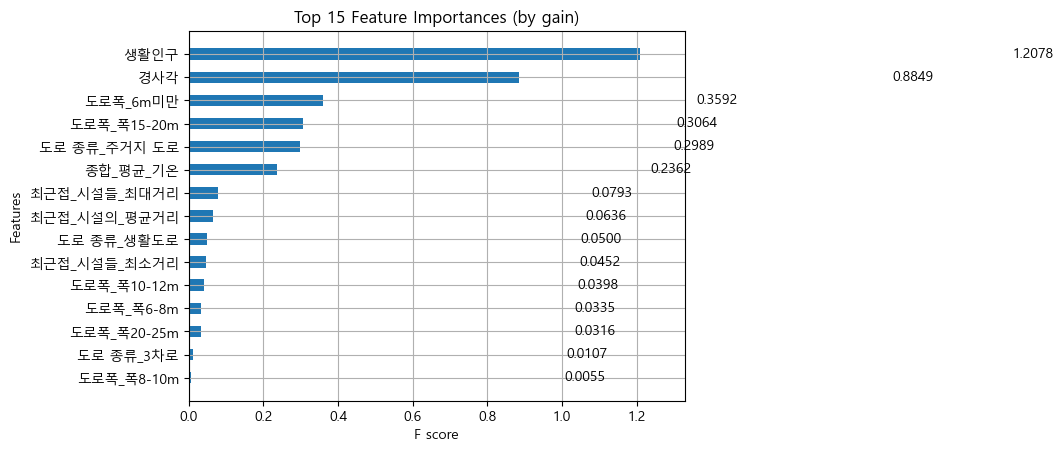

In [53]:
# 해당 특성으로 split할 때 예측 오류(RMSE 등)가 얼마나 개선되었는지의 평균
xgb.plot_importance(xgb_best_model, height=0.5, max_num_features=15, importance_type='gain', values_format="{v:.4f}")
plt.title("Top 15 Feature Importances (by gain)")
plt.show()

In [55]:
# ② SHAP explainer 생성
explainer = shap.Explainer(xgb_best_model, X_train)

# ③ SHAP 값 계산 (X_train과 같은 형태로)
shap_values = explainer(X_train)

 95%|=================== | 5442/5727 [00:18<00:00]       

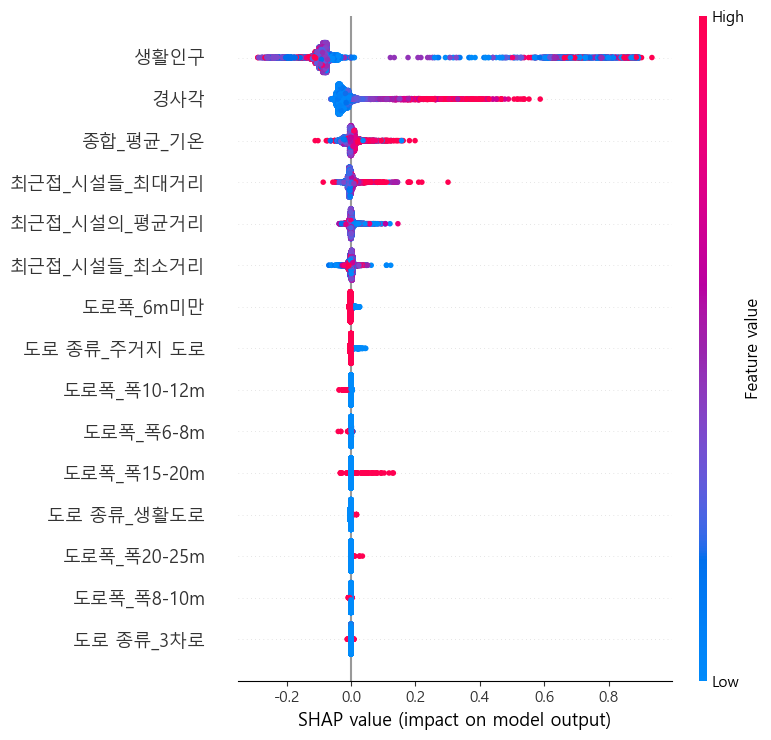

In [57]:
shap.summary_plot(shap_values, X_train)

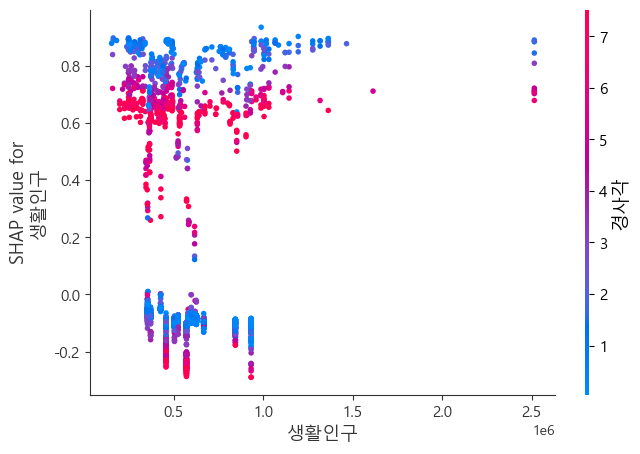

In [61]:
shap.dependence_plot("생활인구", shap_values.values, X_train)#, interaction_index="생활인구")

In [ ]:

# booster에서 중요도 딕셔너리 추출 (gain 기준)
booster = xgb_best_model.get_booster()
# 해당 특성으로 split할 때 예측 오류(RMSE 등)가 얼마나 개선되었는지의 평균
score = booster.get_score(importance_type='gain')

# 딕셔너리를 데이터프레임으로 정렬
importance_df = pd.DataFrame.from_dict(score, orient='index', columns=['gain'])
importance_df.sort_values(by='gain', ascending=False, inplace=True)
importance_df

In [ ]:
# 딕셔너리를 데이터프레임으로 정렬
importance_df = pd.DataFrame.from_dict(score, orient='index', columns=['gain'])
importance_df.sort_values(by='gain', ascending=True, inplace=True)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df.index, importance_df['gain'])
for i, (feature, value) in enumerate(zip(importance_df.index, importance_df['gain'])):
    plt.text(value, i, f"{value:.4f}", va='center', ha='left')  # 막대 끝에 값 표시
plt.xlabel("Feature Importance (gain)")
plt.title("XGBoost Feature Importances by Gain")
plt.tight_layout()
plt.show()

In [ ]:
# SHAP 값만 추출 (DataFrame으로 변환)
shap_df = pd.DataFrame(shap_values.values, columns=X_train.columns)

# 특성별 평균 절댓값 계산 → 영향력 순위 정리
mean_abs_shap = shap_df.abs().mean().sort_values(ascending=True)

# 보기 좋게 DataFrame으로 정리
shap_summary = pd.DataFrame({
    'feature': mean_abs_shap.index,
    'mean_abs_shap': mean_abs_shap.values
})
shap_summary

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(shap_summary['feature'], shap_summary['mean_abs_shap'])
for i, (feature, value) in enumerate(zip(shap_summary['feature'], shap_summary['mean_abs_shap'])):
    plt.text(value, i, f"{value:.5f}", va='center', ha='left')
plt.xlim(right=0.2)
plt.tight_layout()
plt.show()

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
treeExplainer = shap.TreeExplainer(xgb_best_model)            # 트리 모델 전달
tree_shap_values = treeExplainer.shap_values(X_train)     # SHAP 값 계산

In [ ]:
# summary plot을 이미지로 저장
shap.summary_plot(shap_values, X_train, show=False)
plt.savefig("shap_summary_plot.png", bbox_inches='tight')

In [ ]:
shap.plots.bar(shap_values[10])

In [507]:
y_pred = xgb_best_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy_score(y_test, y_pred_binary)

0.9888268156424581

In [509]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9853351955307262

In [511]:
param_distributions = {
    'n_estimators': [100, 200, 300, 400],               # 전체 트리 개수
    'learning_rate': [0.01, 0.05, 0.1, 0.2],            # 학습률 (작을수록 느리지만 안정적)
    'max_depth': [3, 4, 5, 6, 7],                       # 개별 트리의 최대 깊이 (복잡도)
    'min_child_weight': [1, 3, 5, 7],                   # 리프 노드에서 필요한 최소 샘플 가중치 총합
    'subsample': [0.6, 0.8, 1.0],                       # 트리마다 사용하는 데이터 샘플 비율
    'colsample_bytree': [0.6, 0.8, 1.0],                # 트리마다 사용하는 특성 비율
    'gamma': [0, 0.1, 0.3],                             # 분할을 위한 최소 손실 감소량 (크면 덜 복잡)
    'reg_alpha': [0, 0.1, 0.5],                         # L1 정규화 (가중치 0 유도 → 변수 제거 유도)
    'reg_lambda': [0.5, 1, 2],                          # L2 정규화 (가중치 크기 제한)
    'scale_pos_weight': [1, 2, 5, 10]                   # 불균형 데이터에서 1 클래스에 가중치 부여
}

In [521]:
model = xgb.XGBClassifier(eval_metric='logloss', tree_method='hist', device='cuda', random_state=42)

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=300,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=7,
    random_state=42,
    error_score='raise'
)

search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Best R² score:", search.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\smhrd\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[15:40:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device='cuda',
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                   n_iter=200, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0.5, 1, 2],
                                        'scale_pos_weight': [1, 2, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [523]:
print("Best params:", search.best_params_)
print("Best R² score:", search.best_score_)

Best params: {'subsample': 1.0, 'scale_pos_weight': 1, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Best R² score: 0.990161225785658


In [169]:
X = pd.get_dummies(data[['도로 종류', '도로폭', '경사각', '최근접_시설의_평균거리', '종합_평균_기온', '생활인구', '최근접_시설들_최소거리', '최근접_시설들_최대거리']])
y = data['열선']
X['최근접_시설의_최대_최소_차이'] = X['최근접_시설들_최대거리'] - X['최근접_시설들_최소거리']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
X_train = X_train.astype('float')
X_test = X_test.astype('float')
X = X.astype('float')


In [171]:
xgbc_best_model = xgb.XGBClassifier(subsample= 1.0, scale_pos_weight= 1, reg_lambda= 0.5, reg_alpha= 0.5, n_estimators= 400, min_child_weight= 1, max_depth= 4, learning_rate= 0.05, gamma= 0, colsample_bytree= 1.0)
xgbc_best_model.fit(X_train, y_train)

y_pred = xgbc_best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy}')

accuracy: 0.9874301675977654


In [173]:
# === PR AUC 계산 함수 ===
def compute_pr_auc(y_true, y_prob):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    return auc(recall, precision)

# 훈련셋 성능
print("Train f1:", f1_score(y_train, xgbc_best_model.predict(X_train)))
print("Train ROC AUC:", roc_auc_score(y_train, xgbc_best_model.predict_proba(X_train)[:, 1]))
print("Train PR AUC:", compute_pr_auc(y_train, xgbc_best_model.predict_proba(X_train)[:, 1]))

# 검증셋성능
print("Test  f1:", f1_score(y_test, xgbc_best_model.predict(X_test)))
print("Test ROC AUC:", roc_auc_score(y_test, xgbc_best_model.predict_proba(X_test)[:, 1]))
print("Test PR AUC:", compute_pr_auc(y_test, xgbc_best_model.predict_proba(X_test)[:, 1]))

# 5-폴드 교차검증으로 accuracy 확인
accuracy_scores = cross_val_score(xgbc_best_model, X_train, y_train, cv=5, scoring='accuracy')

# 출력
print("각 fold의 accuracy 점수:", accuracy_scores)
print(f"평균 accuracy: {accuracy_scores.mean():.4f}")
print(f"표준편차: {accuracy_scores.std():.4f}")

# 5-폴드 교차검증으로 f1-score 확인
f1_scores = cross_val_score(xgbc_best_model, X_train, y_train, cv=5, scoring='f1')

# 출력
print("각 fold의 f1 점수:",f1_scores)
print(f"평균 accuracy: {f1_scores.mean():.4f}")
print(f"표준편차: {f1_scores.std():.4f}")

# 5-폴드 교차검증으로 roc auc 확인
roc_auc_scores = cross_val_score(xgbc_best_model, X_train, y_train, cv=5, scoring='roc_auc')

# 출력
print("각 fold의 roc auc 점수:",roc_auc_scores)
print(f"평균 accuracy: {roc_auc_scores.mean():.4f}")
print(f"표준편차: {roc_auc_scores.std():.4f}")

Train f1: 0.9713239780353874
Test  f1: 0.9558823529411765
각 fold의 accuracy 점수: [0.98254799 0.98429319 0.98864629 0.9860262  0.98340611]
평균 accuracy: 0.9850
표준편차: 0.0022
각 fold의 f1 점수: [0.9382716  0.94478528 0.96072508 0.95061728 0.94080997]
평균 accuracy: 0.9470
표준편차: 0.0080
각 fold의 roc auc 점수: [0.99217    0.98922859 0.99287481 0.98722706 0.9886527 ]
평균 accuracy: 0.9900
표준편차: 0.0021


In [175]:
explainer = shap.Explainer(xgbc_best_model, X)
shap_values = explainer(X)

 98%|===================| 7028/7159 [00:27<00:00]        

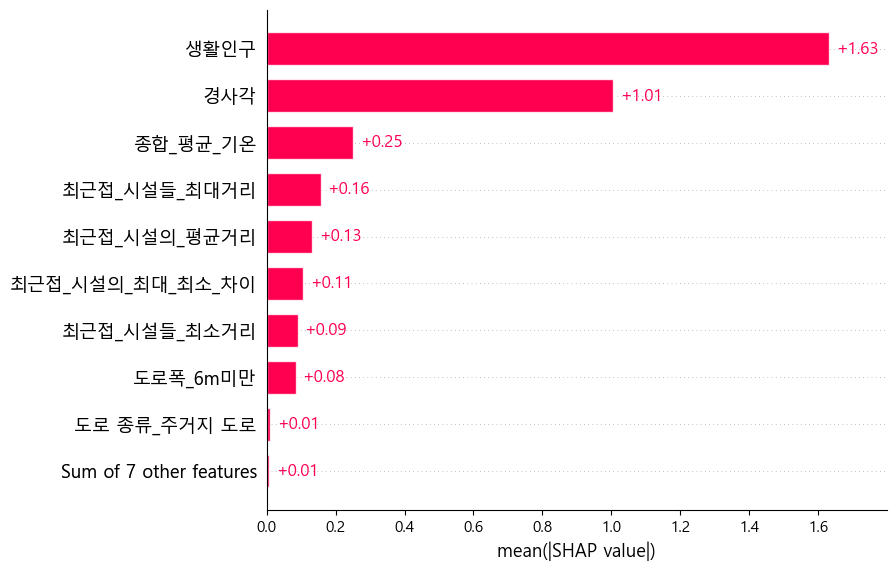

In [176]:
shap.plots.bar(shap_values)

In [177]:
mean_shap_df = pd.DataFrame({
    'feature': X.columns,
    'mean_abs_shap': shap_values.abs.mean(0).values
}).sort_values(by='mean_abs_shap', ascending=False)

print(mean_shap_df.head(20))

             feature  mean_abs_shap
3               생활인구       1.631974
0                경사각       1.005938
2           종합_평균_기온       0.250795
5       최근접_시설들_최대거리       0.156360
1       최근접_시설의_평균거리       0.131887
15  최근접_시설의_최대_최소_차이       0.106702
4       최근접_시설들_최소거리       0.090364
9           도로폭_6m미만       0.083957
8       도로 종류_주거지 도로       0.009763
13         도로폭_폭6-8m       0.004510
11       도로폭_폭15-20m       0.003150
10       도로폭_폭10-12m       0.000086
6          도로 종류_3차로       0.000000
7         도로 종류_생활도로       0.000000
12       도로폭_폭20-25m       0.000000
14        도로폭_폭8-10m       0.000000


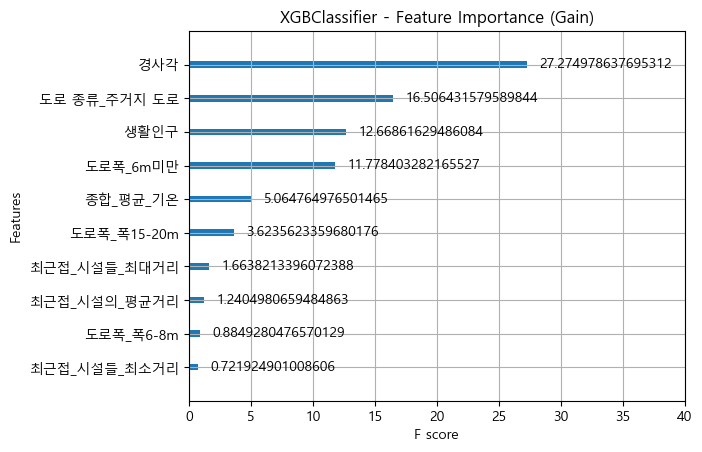

In [565]:
# 중요도 시각화 (기본은 weight 기준 → gain 기준으로 변경 권장)
plot_importance(xgbc_best_model, importance_type='gain', max_num_features=15)
plt.title("XGBClassifier - Feature Importance (Gain)")
# plt.tight_layout()
plt.xlim(right=40)
plt.show()

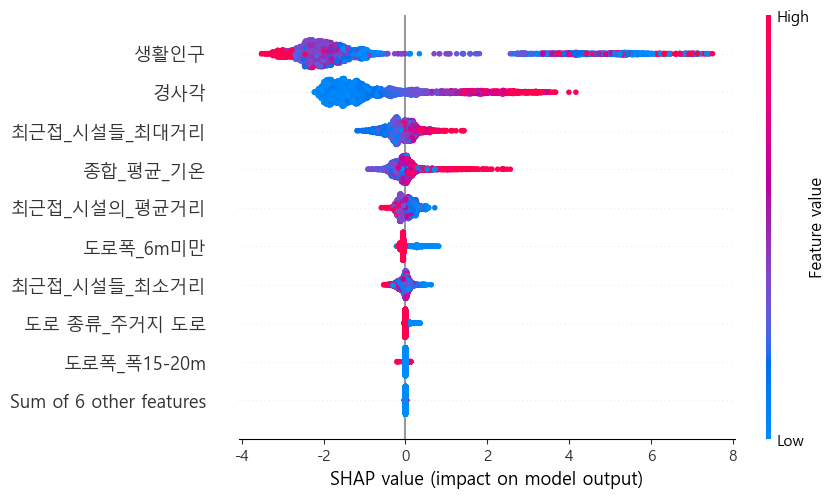

In [569]:
explainer = shap.Explainer(xgbc_best_model)
shap_values = explainer(X_train)

# 요약 플롯
shap.plots.beeswarm(shap_values)

         Feature  Mean |SHAP Value|
3           생활인구           2.389971
0            경사각           1.378908
5   최근접_시설들_최대거리           0.255987
2       종합_평균_기온           0.218724
1   최근접_시설의_평균거리           0.146885
9       도로폭_6m미만           0.112383
4   최근접_시설들_최소거리           0.093050
8   도로 종류_주거지 도로           0.015749
11   도로폭_폭15-20m           0.003170
13     도로폭_폭6-8m           0.001566
6      도로 종류_3차로           0.000000
7     도로 종류_생활도로           0.000000
10   도로폭_폭10-12m           0.000000
12   도로폭_폭20-25m           0.000000
14    도로폭_폭8-10m           0.000000


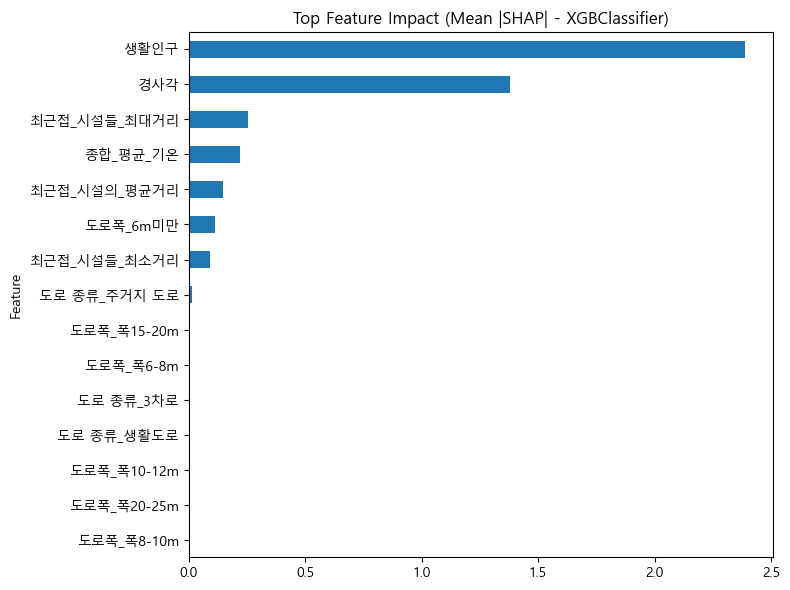

In [573]:
# 2. 절대값의 평균 계산
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

# 3. 특성 이름과 함께 DataFrame으로 정리
shap_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Mean |SHAP Value|': mean_abs_shap
})

# 4. 중요도 순으로 정렬
shap_importance = shap_importance.sort_values(by='Mean |SHAP Value|', ascending=False)

# 5. 상위 15개 출력
print(shap_importance.head(15))

top_n = 15
shap_importance.head(top_n).plot(
    kind='barh',
    x='Feature',
    y='Mean |SHAP Value|',
    legend=False,
    figsize=(8, 6)
)
plt.gca().invert_yaxis()
plt.title("Top Feature Impact (Mean |SHAP| - XGBClassifier)")
plt.tight_layout()
plt.show()

In [607]:
# 클래스별 확률을 출력
y_proba = xgbc_best_model.predict_proba(data_test)

# 양성 클래스(1일 확률)만 추출
y_prob_1 = y_proba[:, 1]

In [609]:
y_prob_1.max()

0.633622

In [29]:
param_distributions = {
    'n_estimators': randint(100, 1000),              # 트리 개수
    'learning_rate': uniform(0.01, 0.2),             # 학습률
    'max_depth': randint(3, 10),                     # 트리 깊이
    'num_leaves': randint(20, 150),                  # 리프 노드 개수
    'min_child_samples': randint(10, 100),           # 리프 노드 최소 데이터 수
    'subsample': uniform(0.6, 0.4),                  # 데이터 샘플링 비율
    'colsample_bytree': uniform(0.6, 0.4),           # 특성 샘플링 비율
    'reg_alpha': uniform(0.0, 1.0),                  # L1 정규화
    'reg_lambda': uniform(0.0, 1.0),                 # L2 정규화
    'device': ['gpu'],                               # GPU 사용
    'boosting_type': ['gbdt'],                       # 기본 boosting 방식
    'objective': ['binary']                          # 이진 분류
}

In [193]:
model = LGBMClassifier(device='gpu', random_state=42, verbose = -1)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=200,                 # 실험 횟수 (예: 100개 조합)
    scoring='f1',               # 불균형이면 f1 추천
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

NameError: name 'param_distributions' is not defined

In [51]:
lgbm_best_params = random_search.best_params_

In [53]:
model = LGBMClassifier(**lgbm_best_params)

In [55]:
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 841, number of negative: 4886
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1444
[LightGBM] [Info] Number of data points in the train set: 5727, number of used features: 15
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 Ti Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.04 MB) transferred to GPU in 0.000444 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.146848 -> initscore=-1.759538
[LightGBM] [Info] Start training from score -1.759538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

LGBMClassifier(colsample_bytree=0.8483662071069908, device='gpu',
               learning_rate=0.01914840676250257, max_depth=4,
               min_child_samples=23, n_estimators=803, num_leaves=48,
               objective='binary', reg_alpha=0.44595830701032146,
               reg_lambda=0.6475736434019076, subsample=0.8377583436914181)

In [61]:
from sklearn.model_selection import StratifiedKFold

# 모델 정의 (필요하면 best_params 사용 가능)
model = LGBMClassifier(**lgbm_best_params, verbose=-1)

# 정확도
acc_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"✅ Accuracy     : {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")

# F1-score
f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print(f"✅ F1 Score     : {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")

# ROC AUC
roc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f"✅ ROC AUC      : {roc_scores.mean():.4f} ± {roc_scores.std():.4f}")

✅ Accuracy     : 0.9645 ± 0.0107
✅ F1 Score     : 0.8691 ± 0.0481
✅ ROC AUC      : 0.9676 ± 0.0188


In [69]:
param_dist_simple = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 1],
    'reg_lambda': [0, 1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'device': ['gpu'],
    'random_state': [42]
}

In [73]:
model = LGBMClassifier(device='gpu', random_state=42, verbose = -1)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist_simple,
    n_iter=300,                 # 실험 횟수 (예: 100개 조합)
    scoring='f1',               # 불균형이면 f1 추천
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


C:\Users\smhrd\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(device='gpu', random_state=42,
                                            verbose=-1),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'device': ['gpu'],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'random_state': [42],
                                        'reg_alpha': [0, 1],
                                        'reg_lambda': [0, 1],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=2)

In [77]:
lgbm_best_params = random_search.best_params_

In [79]:
lgbm_class_model = LGBMClassifier(**lgbm_best_params)
lgbm_class_model.fit(X_train, y_train)
    

LGBMClassifier(colsample_bytree=0.8, device='gpu', max_depth=3,
               n_estimators=500, random_state=42, reg_alpha=1, reg_lambda=0)

In [83]:
# 정확도
acc_scores = cross_val_score(lgbm_class_model, X, y, cv=5, scoring='accuracy')
print(f"✅ Accuracy     : {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")

# F1-score
f1_scores = cross_val_score(lgbm_class_model, X, y, cv=5, scoring='f1')
print(f"✅ F1 Score     : {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")

# ROC AUC
roc_scores = cross_val_score(lgbm_class_model, X, y, cv=5, scoring='roc_auc')
print(f"✅ ROC AUC      : {roc_scores.mean():.4f} ± {roc_scores.std():.4f}")

✅ Accuracy     : 0.9633 ± 0.0097
✅ F1 Score     : 0.8665 ± 0.0420
✅ ROC AUC      : 0.9639 ± 0.0264


In [151]:
param_dist_simple = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.9, 1.0],
    'min_child_samples': np.arange(10, 51, 5),
    'device': ['gpu'],
    'random_state': [42]
}

In [153]:
model = LGBMClassifier(device='gpu', random_state=42, verbose = -1, class_weight='balanced')

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist_simple,
    n_iter=300,                 # 실험 횟수 (예: 100개 조합)
    scoring='f1',               # 불균형이면 f1 추천
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

lgbm_best_params = random_search.best_params_
print(random_search.best_params_)
lgbm_class_model = LGBMClassifier(**lgbm_best_params)
lgbm_class_model.fit(X_train, y_train)


# 정확도
acc_scores = cross_val_score(lgbm_class_model, X, y, cv=5, scoring='accuracy')
print(f"✅ Accuracy     : {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")

# F1-score
f1_scores = cross_val_score(lgbm_class_model, X, y, cv=5, scoring='f1')
print(f"✅ F1 Score     : {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")

# ROC AUC
roc_scores = cross_val_score(lgbm_class_model, X, y, cv=5, scoring='roc_auc')
print(f"✅ ROC AUC      : {roc_scores.mean():.4f} ± {roc_scores.std():.4f}")

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
{'subsample': 0.8, 'random_state': 42, 'n_estimators': 300, 'min_child_samples': 10, 'max_depth': 3, 'learning_rate': 0.2, 'device': 'gpu', 'colsample_bytree': 0.9}
✅ Accuracy     : 0.9617 ± 0.0084
✅ F1 Score     : 0.8625 ± 0.0358
✅ ROC AUC      : 0.9546 ± 0.0351


In [157]:
y_pred = lgbm_class_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

print(f"✅ PR AUC: {pr_auc:.4f}")

✅ PR AUC: 0.9840


In [161]:
print(f"Test set 정답 비율 (1의 비중): {np.mean(y_test):.4f}")

Test set 정답 비율 (1의 비중): 0.1466


In [163]:
print(np.unique(y_test))         # 값이 0, 1만 있는지
print(y_pred[:10])               # 예측 확률이 어떻게 분포돼 있는지

[0 1]
[5.05225432e-04 5.22316589e-04 9.65161432e-06 9.97331447e-01
 2.21229073e-03 1.21636538e-02 8.34788444e-04 5.43454941e-04
 9.29998170e-04 9.55686289e-01]


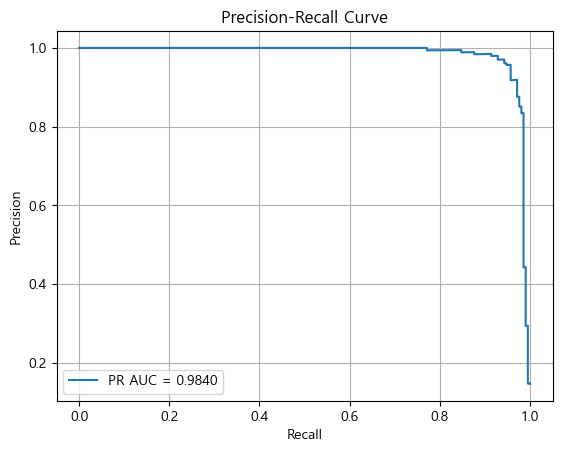

In [165]:

plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

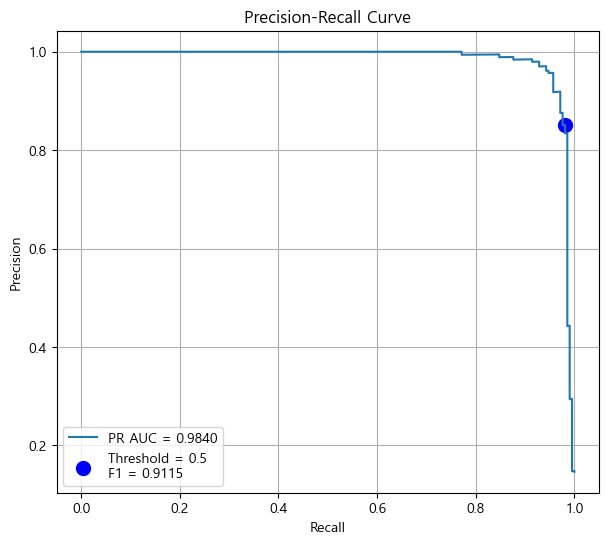

In [201]:
# y_score = model.predict_proba(X_test)[:, 1]
# y_true = y_test

# 1. threshold = 0.5 기준으로 이진 예측
y_pred_05 = (y_pred >= 0.05).astype(int)

# 2. Precision, Recall, F1 계산
prec_05 = precision_score(y_test, y_pred_05)
rec_05 = recall_score(y_test, y_pred_05)
f1_05 = f1_score(y_test, y_pred_05)

# 3. PR 커브 전체 계산
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

# 4. 그래프
plt.figure(figsize=(7, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.scatter(rec_05, prec_05, color='blue', s=100, label=f'Threshold = 0.5\nF1 = {f1_05:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()
# 🔍 출력 예시

In [177]:
# F1-score
f1_scores = cross_val_score(lgbm_class_model, X, y, cv=5, scoring='f1')
print(f"✅ F1 Score     : {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")
print(f1_scores)
f1_score(y_test, y_pred_05)

✅ F1 Score     : 0.8625 ± 0.0358
[0.88040712 0.8034188  0.86651054 0.85057471 0.91176471]


0.9402985074626866

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
X_train = X_train.astype('float')
X_test = X_test.astype('float')

# === 예측값과 확률 ===
y_train_pred = lgbm_class_model.predict(X_train)
y_train_prob = lgbm_class_model.predict_proba(X_train)[:, 1]

y_test_pred = lgbm_class_model.predict(X_test)
y_test_prob = lgbm_class_model.predict_proba(X_test)[:, 1]

# === PR AUC 계산 함수 ===
def compute_pr_auc(y_true, y_prob):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    return auc(recall, precision)

# === 훈련셋 지표 ===
acc_train = accuracy_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_train = roc_auc_score(y_train, y_train_prob)
pr_train = compute_pr_auc(y_train, y_train_prob)

# === 테스트셋 지표 ===
acc_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_test = roc_auc_score(y_test, y_test_prob)
pr_test = compute_pr_auc(y_test, y_test_prob)

# === 결과 출력 ===
print(f"✅ Accuracy    - Train: {acc_train:.4f} | Test: {acc_test:.4f}")
print(f"✅ F1 Score    - Train: {f1_train:.4f} | Test: {f1_test:.4f}")
print(f"✅ ROC AUC     - Train: {roc_train:.4f} | Test: {roc_test:.4f}")
print(f"✅ PR AUC      - Train: {pr_train:.4f} | Test: {pr_test:.4f}")

✅ Accuracy    - Train: 0.9962 | Test: 0.9832
✅ F1 Score    - Train: 0.9868 | Test: 0.9403
✅ ROC AUC     - Train: 1.0000 | Test: 0.9913
✅ PR AUC      - Train: 0.9997 | Test: 0.9840


In [93]:
random_search.best_params_

{'subsample': 0.8,
 'random_state': 42,
 'n_estimators': 300,
 'min_child_samples': 15,
 'max_depth': 3,
 'learning_rate': 0.1,
 'device': 'gpu',
 'colsample_bytree': 1.0}

In [97]:
probs = lgbm_class_model.predict_proba(X_test)[:, 1]  # 양성 클래스 확률
thresholds = np.arange(0.1, 0.9, 0.01)
f1s = [f1_score(y_test, (probs > t).astype(int)) for t in thresholds]

best_thresh = thresholds[np.argmax(f1s)]
best_f1 = max(f1s)

print(f"F1 최대값: {best_f1:.4f}, 최적 threshold: {best_thresh:.2f}")

F1 최대값: 0.9584, 최적 threshold: 0.30


In [ ]:
y_test_pred = (model.predict_proba(X_test)[:, 1] > best_threshold).astype(int)

# 정확도
acc_scores = cross_val_score(lgbm_class_model, X, y, cv=5, scoring='accuracy')
print(f"✅ Accuracy     : {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")

# F1-score
f1_scores = cross_val_score(lgbm_class_model, X, y, cv=5, scoring='f1')
print(f"✅ F1 Score     : {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")

# ROC AUC
roc_scores = cross_val_score(lgbm_class_model, X, y, cv=5, scoring='roc_auc')
print(f"✅ ROC AUC      : {roc_scores.mean():.4f} ± {roc_scores.std():.4f}")

In [115]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

thresholds = np.arange(0.1, 0.9, 0.01)
threshold_f1s = []

# threshold마다 F1-score 평균 저장
for threshold in thresholds:
    fold_f1s = []

    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y[train_idx], y[test_idx]
        lgbm_class_model.fit(X_train, y_train)
        y_proba = lgbm_class_model.predict_proba(X_test)[:, 1]
        y_pred = (y_proba > threshold).astype(int)

        fold_f1s.append(f1_score(y_test, y_pred))

    threshold_f1s.append(np.mean(fold_f1s))

# 최적 threshold 및 F1-score 출력
best_idx = np.argmax(threshold_f1s)
best_threshold = thresholds[best_idx]
best_f1 = threshold_f1s[best_idx]

print(f"✅ 최적 threshold: {best_threshold:.2f}, 평균 F1-score: {best_f1:.4f}")

(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5728, 15) (1431, 15) (5728,) (1431,)
(1431,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5728, 15) (1431, 15) (5728,) (1431,)
(1431,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5728, 15) (1431, 15) (5728,) (1431,)
(1431,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5728, 15) (1431, 15) (5728,) (1431,)
(1431,)
(5727, 15) (1432, 15) (5727,) (1432,)
(1432,)
(5727, 15) (1432, 15) (5727,) (143

In [149]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# TPR, FPR 계산
tpr = tp / (tp + fn)  # 재현율
fpr = fp / (fp + tn)  # 위양성률

print(f"TPR (Recall): {tpr:.4f}")
print(f"FPR: {fpr:.4f}")

TPR (Recall): 0.9524
FPR: 0.0016


In [147]:
# y_true: 실제 정답 (0/1), y_prob: 예측 확률
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# TPR - FPR 계산
j_scores = tpr - fpr

# 최대값 위치
j_max_idx = np.argmax(j_scores)
best_threshold = thresholds[j_max_idx]
best_tpr = tpr[j_max_idx]
best_fpr = fpr[j_max_idx]

print(f"✅ TPR - FPR 최대값: {j_scores[j_max_idx]:.4f}")
print(f"→ 최적 threshold: {best_threshold:.4f}")
print(f"→ TPR: {best_tpr:.4f}, FPR: {best_fpr:.4f}")

✅ TPR - FPR 최대값: 0.9507
→ 최적 threshold: 1.0000
→ TPR: 0.9524, FPR: 0.0016


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
X_train = X_train.astype('float')
X_test = X_test.astype('float')

best_params = {
                 'subsample': 0.8,
                 'random_state': 42,
                 'n_estimators': 300,
                 'min_child_samples': 15,
                 'max_depth': 3,
                 'learning_rate': 0.1,
                 'device': 'gpu',
                 'colsample_bytree': 1.0,
                 'class_weight': 'balanced'}
lgbm_class_model = LGBMClassifier(**best_params)
lgbm_class_model.fit(X_train, y_train)



LGBMClassifier(class_weight='balanced', device='gpu', max_depth=3,
               min_child_samples=15, n_estimators=300, random_state=42,
               subsample=0.8)

In [201]:
# 파라미터 그리드 (Pipeline 내부 모델 기준으로 이름 지정)
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan'],
    'kneighborsclassifier__leaf_size': [20, 40, 60],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree']
}

In [203]:
# 모델 정의
knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

# PR AUC scoring 함수
pr_auc_scorer = make_scorer(average_precision_score, response_method='predict')

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_grid,
    n_iter=150,  # 실험 횟수 조절 가능
    scoring=pr_auc_scorer,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 학습
random_search.fit(X_train, y_train)

# 결과 출력
print("Best PR AUC score:", random_search.best_score_)
print("Best parameters:", random_search.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best PR AUC score: 0.5294501009038226
Best parameters: {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__leaf_size': 40, 'kneighborsclassifier__algorithm': 'ball_tree'}


C:\Users\smhrd\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [235]:
X = pd.get_dummies(data[['도로 종류', '도로폭', '경사각', '최근접_시설의_평균거리', '종합_평균_기온', '생활인구', '최근접_시설들_최소거리', '최근접_시설들_최대거리']])
y = data['열선']
# X['생활인구'] = X['생활인구']*0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
X_train = X_train.astype('float')
X_test = X_test.astype('float')
X = X.astype('float')

In [237]:
# 최적 파라미터를 반영해서 파이프라인 재생성
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(
        weights='distance',
        n_neighbors=3,
        metric='euclidean',
        leaf_size=40,
        algorithm='ball_tree'
    ))
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=40,
                                      metric='euclidean', n_neighbors=3,
                                      weights='distance'))])

In [239]:
# 예측 (확률 및 클래스)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]
y_pred = pipe.predict(X_test)

# 성능 지표 계산
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred_proba)
pr = average_precision_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# 출력
print(f"✅ Accuracy     : {acc:.4f}")
print(f"✅ ROC AUC      : {roc:.4f}")
print(f"✅ PR AUC       : {pr:.4f}")
print(f"✅ F1 Score     : {f1:.4f}")

✅ Accuracy     : 0.9316
✅ ROC AUC      : 0.9064
✅ PR AUC       : 0.8094
✅ F1 Score     : 0.7101


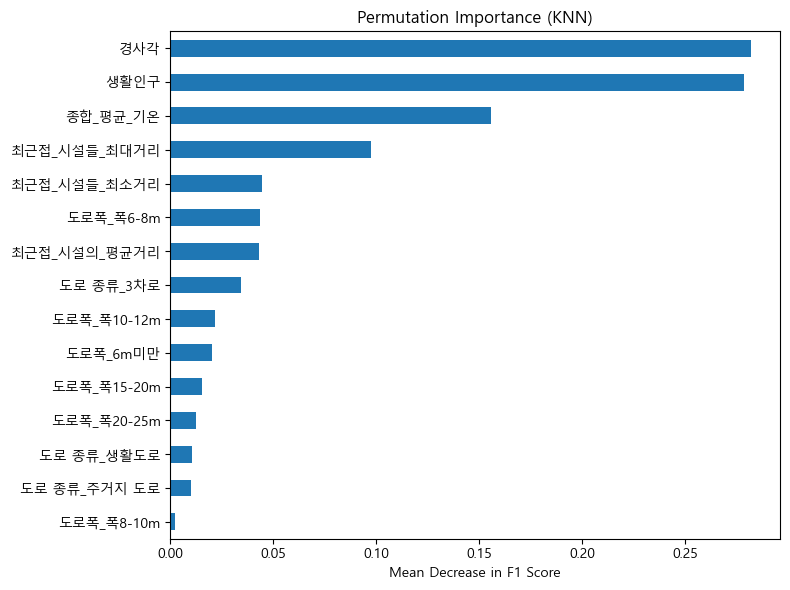

In [241]:
# permutation importance 계산
result = permutation_importance(pipe, X_test, y_test, scoring='f1', n_repeats=10, random_state=42)

# 결과 정리
importances = pd.Series(result.importances_mean, index=X_test.columns)
importances = importances.sort_values(ascending=True)

# 시각화
plt.figure(figsize=(8, 6))
importances.plot(kind='barh')
plt.xlabel("Mean Decrease in F1 Score")
plt.title("Permutation Importance (KNN)")
plt.tight_layout()
plt.show()

In [273]:
X_train

경사각  최근접_시설의_평균거리  종합_평균_기온          생활인구  최근접_시설들_최소거리  \
5266   1.508851    175.100996 -2.071086  5.717035e+05    118.213738   
5441   0.641975    210.461591 -1.604849  5.717035e+05    123.889954   
7024   0.685680    156.410681 -1.778418  3.563860e+05     52.160495   
7129   0.655346    266.655484 -1.874835  3.563860e+05    129.839611   
4454  10.899556    213.662838 -2.794700  5.717035e+05     83.167314   
6791   2.212954     68.801209 -1.963703  4.272949e+05     27.743461   
1101   0.850776     31.282671 -1.225829  6.681805e+05     21.566577   
2865   1.003216    162.545338 -1.339098  5.048045e+05    114.181955   
1499   0.140145     95.003445 -2.329602  5.048045e+05     43.487667   
6357   0.010897    199.716017 -1.852931  6.271072e+05    102.068117   
3921   0.912678     83.458643 -1.334161  6.681805e+05     59.929671   
2206   5.677247    126.265737 -1.758337  5.717035e+05     60.015595   
577   15.589081     93.799735  0.039256  5.335200e+05     57.386262   
59     0.761636    192.443248 -1.105837  1.277218e+06    124.243308   
5738   0.091549    208.079423 -1.837199  9.330331e+05    114.141723   
787    6.946761    324.961318 -1.643008  4.469154e+05    176.593705   
2550   0.000869    295.994151 -1.542641  5.822925e+05    223.890828   
4553   1.680329    107.823522 -1.723113  5.717035e+05     60.385197   
1790   0.905744    176.086577 -1.663829  6.199545e+05    147.253378   
4230   0.638527    236.580106 -2.517707  3.714027e+05    183.239396   
5704   1.602322    389.632495 -2.105836  9.330331e+05    267.700763   
5455   3.285990    162.875987 -1.289453  4.576247e+05     73.533629   
6106   0.024766    224.823759 -1.406234  5.822925e+05    128.575194   
1345   0.095954    142.990830 -1.355486  5.048045e+05     55.050835   
1183   0.487955    103.439559 -2.582071  3.538120e+05     19.176947   
2154   0.741802    207.236332 -0.607376  5.048045e+05    148.668752   
6568   0.966980    184.136799 -2.111694  3.538120e+05    147.492661   
4128   0.666556    102.528648 -1.611989  3.714027e+05     18.007613   
4229   0.451192    235.677750 -2.087512  3.714027e+05    186.231906   
3142   0.486437     75.857154 -1.511423  5.048045e+05     38.043416   
6075   0.098716    174.441376 -1.439303  5.822925e+05     65.987567   
184    1.852227     81.223735 -1.164855  2.624958e+05     38.138601   
1694   1.381000    299.722265 -1.722296  3.714027e+05    187.449631   
2020   0.780509    196.895910 -1.248521  6.271072e+05    130.993297   
420    4.111751    146.608466 -2.672420  3.551611e+05     99.087424   
4997   0.232310    128.782100 -1.660050  6.681805e+05     29.910502   
553   10.542422    252.434418 -1.011633  5.335200e+05    100.411504   
1397   0.856600    105.103715 -0.997648  6.199545e+05     71.023598   
6398   0.206848    347.238348 -1.687708  9.330331e+05    185.656091   
1870   0.062080    203.145833 -1.010693  6.271072e+05    170.019907   
6006   0.142407    154.771338 -1.111676  5.822925e+05     48.924471   
4715   0.950963    162.424805 -1.215499  4.576247e+05     88.143913   
4340   1.202730    115.721942 -1.833743  5.717035e+05     70.216090   
443    6.755219     91.998961 -1.073632  8.321879e+05     41.981213   
2846   1.467751    110.170520 -1.045387  6.681805e+05     90.244828   
3103   0.085863     75.511609 -1.456678  5.048045e+05     40.899446   
1737   0.163265    109.476304 -2.402758  6.199545e+05     74.874854   
3340   0.354335    137.545344 -1.280460  5.982119e+05    108.626564   
6578   0.726749    174.480744 -1.651553  3.538120e+05    135.849733   
2126   0.106065    216.791708 -0.737660  6.271072e+05     96.388849   
1649   1.045521    154.878766 -1.661930  8.450036e+05    114.464483   
6898   5.479143    142.641274 -1.587949  5.717035e+05    122.994071   
181    3.076212    120.913938 -1.615236  5.534722e+05     84.664029   
5155   1.558558    148.834641 -1.452102  4.272949e+05     98.412968   
794    8.807069    146.120582 -1.176192  8.525622e+05     55.299922   
6856   5.559410    160.926583 -1.755

[0]	train-logloss:0.29777	test-logloss:0.31368
[1]	train-logloss:0.24695	test-logloss:0.26760
[2]	train-logloss:0.20912	test-logloss:0.23595
[3]	train-logloss:0.17918	test-logloss:0.20908
[4]	train-logloss:0.14626	test-logloss:0.18569
[5]	train-logloss:0.12667	test-logloss:0.16927
[6]	train-logloss:0.11268	test-logloss:0.15761
[7]	train-logloss:0.09614	test-logloss:0.14297
[8]	train-logloss:0.08818	test-logloss:0.13685
[9]	train-logloss:0.08205	test-logloss:0.13175
[10]	train-logloss:0.07595	test-logloss:0.12387
[11]	train-logloss:0.06562	test-logloss:0.11175
[12]	train-logloss:0.06243	test-logloss:0.10851
[13]	train-logloss:0.05673	test-logloss:0.10273
[14]	train-logloss:0.05034	test-logloss:0.09654
[15]	train-logloss:0.04774	test-logloss:0.09273
[16]	train-logloss:0.04592	test-logloss:0.09039
[17]	train-logloss:0.04443	test-logloss:0.08868
[18]	train-logloss:0.04272	test-logloss:0.08668
[19]	train-logloss:0.04162	test-logloss:0.08527
[20]	train-logloss:0.03952	test-logloss:0.08509
[2

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

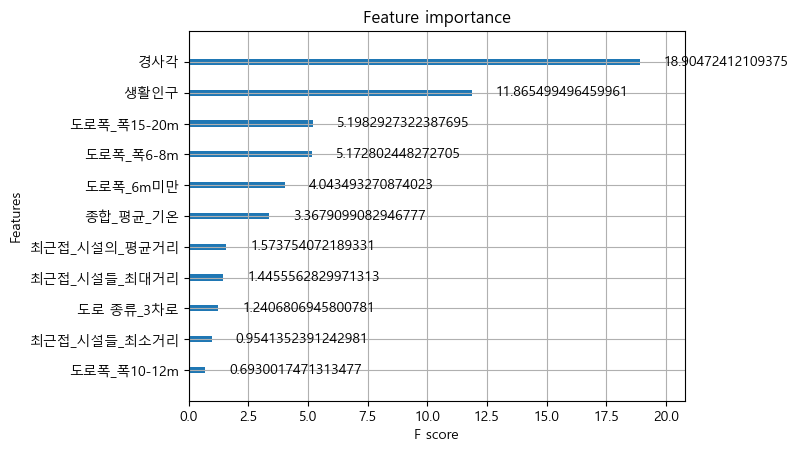

In [313]:
# 2. train/val 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype('float')
X_test = X_test.astype('float')

# 3. 특성 가중치 (예: 5번째 특성만 중요하게 설정)
feature_weights = np.zeros(X.shape[1])
feature_weights[0] = 0  # 중요도를 높이고 싶은 특성

# 4. DMatrix 생성 (train에만 가중치 적용)
dtrain = xgb.DMatrix(X_train, label=y_train, feature_weights=feature_weights)
dtest = xgb.DMatrix(X_test, label=y_test)

# 5. 모델 파라미터 (이진 분류용)
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "verbosity": 1
}

# 6. 학습
evals = [(dtrain, "train"), (dtest, "test")]
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

# 7. 예측 (확률값 출력)
pred_probs = xgb_model.predict(dtest)

# 8. 이진 분류 결과
preds = (pred_probs > 0.5).astype(int)

# 9. 예측값 예시 출력
print(preds[:5])

# 성능 지표 계산
r2 = r2_score(y_test, pred_probs)
f1 = f1_score(y_test, preds)
roc_auc = roc_auc_score(y_test, pred_probs)
pr_auc = average_precision_score(y_test, pred_probs)

print(r2, f1, roc_auc, pr_auc)

xgb.plot_importance(xgb_model, importance_type='gain')

경사각  최근접_시설의_평균거리  종합_평균_기온           생활인구  최근접_시설들_최소거리  \
4002  0.971512    136.137368 -1.743222  525582.687753    102.370479   
4626  1.159156    366.472346 -1.872926  371402.674435    233.912275   
2260  9.960878    136.263448 -2.045033  571703.539756     98.359250   
1152  1.255916    157.452218 -2.266711  619954.473071     52.632586   
6591  0.603226    112.172668 -1.990601  353811.963469     57.565103   
...        ...           ...       ...            ...           ...   
5577  0.184089    209.927008 -2.220919  933033.098567    141.361721   
1815  0.759404    153.913719 -1.893672  619954.473071     71.590703   
4624  0.161736    388.010033 -1.610812  371402.674435    284.062273   
4410  5.487807    274.204454 -0.147322  845003.636200     92.358615   
2041  0.032429    201.955198 -1.147955  627107.215238     59.783529   

      최근접_시설들_최대거리  도로 종류_3차로  도로 종류_생활도로  도로 종류_주거지 도로  도로폭_6m미만  \
4002    219.918560        0.0         0.0           1.0       1.0   
4626    469.986792        0.0         0.0           1.0       1.0   
2260    202.927550        0.0         0.0           1.0       1.0   
1152    296.783016        1.0         0.0           0.0       0.0   
6591    138.345796        0.0         0.0           1.0       1.0   
...            ...        ...         ...           ...       ...   
5577    248.766001        0.0         0.0           1.0       1.0   
1815    223.191323        0.0         0.0           1.0       1.0   
4624    474.328540        0.0         0.0           1.0       1.0   
4410    396.309584        0.0         0.0           1.0       0.0   
2041    354.338017        0.0         0.0           1.0       1.0   

      도로폭_폭10-12m  도로폭_폭15-20m  도로폭_폭20-25m  도로폭_폭6-8m  도로폭_폭8-10m  
4002          0.0          0.0          0.0        0.0         0.0  
4626          0.0          0.0          0.0        0.0         0.0  
2260          0.0          0.0          0.0        0.0         0.0  
1152          0.0          0.0          1.0        0.0         0.0  
6591          0.0          0.0          0.0        0.0         0.0  
...           ...          ...          ...        ...         ...  
5577          0.0          0.0          0.0        0.0         0.0  
1815          0.0          0.0          0.0        0.0         0.0  
4624          0.0          0.0          0.0        0.0         0.0  
4410          0.0          1.0          0.0        0.0         0.0  
2041          0.0          0.0          0.0        0.0         0.0  

[5727 rows x 15 columns]

In [17]:
heat = data.iloc[:1051,:]

In [31]:
gj = data.iloc[1052:,:]

In [47]:
gj['생활인구'].unique()

array([845003.6362    , 598211.94107455, 504804.48055818, 619954.47307091,
       668180.46359273, 582292.51772   , 933033.09856727, 571703.53975636,
       356386.00654727, 525582.68775273, 457624.68362909, 371402.67443455,
       353811.96346909, 627107.21523818, 427294.93784364])

In [43]:
heat[heat['행정구역']=='광진구']['생활인구'].unique()

array([571703.53975636, 598211.94107455, 845003.6362    , 619954.47307091,
       525582.68775273, 457624.68362909, 371402.67443455, 353811.96346909,
       933033.09856727, 427294.93784364])

In [ ]:
627107, 356386, 582292, 668180, 504804